In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/UberDataset.csv")

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.shape

(1156, 7)

the data contains 1156 rows and 7 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.isna().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


lets drop row where end date is na

In [8]:
df[ df['END_DATE'].isna() ].index

Index([1155], dtype='int64')

In [9]:
df.drop(1155 , axis = 0 , inplace = True) # removing the last row of the table

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


splitting date time column into 2 different columns

In [16]:
df['START_DATE']=df['START_DATE'].str.replace("/",'-')

In [18]:
df['END_DATE']=df['END_DATE'].str.replace("/",'-')

lets make a new column containing the duration



In [19]:
df['START_DATE']

,START_DATE
0,01-01-2016 21:11
1,01-02-2016 01:25
2,01-02-2016 20:25
3,01-05-2016 17:31
4,01-06-2016 14:42
...,...
1150,12-31-2016 1:07
1151,12-31-2016 13:24
1152,12-31-2016 15:03
1153,12-31-2016 21:32


In [20]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'],format= '%m-%d-%Y %H:%M')

In [21]:
df['START_DATE']=pd.to_datetime(df['START_DATE'] , format = '%m-%d-%Y %H:%M')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [26]:
df['DURATION']=((df['END_DATE']-df['START_DATE']).dt.total_seconds() )/ 60

In [27]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [28]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

<Axes: xlabel='CATEGORY'>

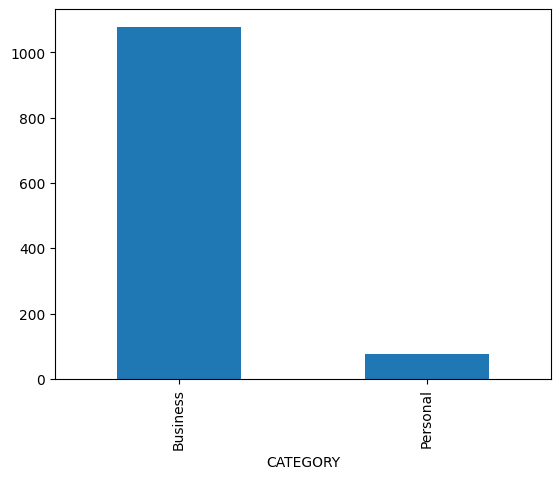

In [29]:
df['CATEGORY'].value_counts().plot(kind= 'bar')

We can see cleearly that most of the uber trip were for BUSINESS purpose than personal reasons

In [30]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [31]:
df['START'].value_counts()

,count
START,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Florence,1
Ridgeland,1
Daytona Beach,1


<Axes: xlabel='START'>

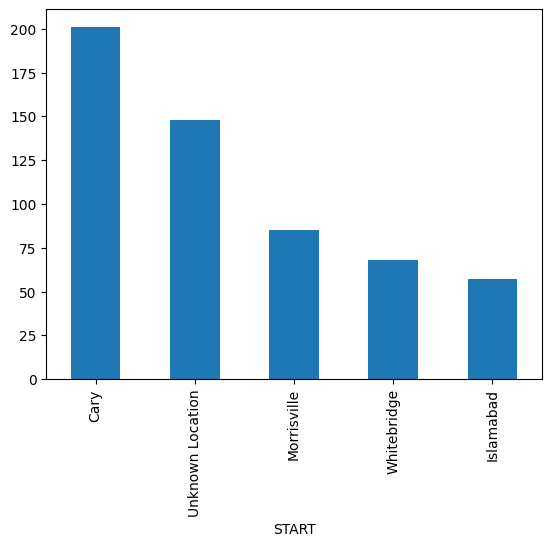

In [33]:
df['START'].value_counts().head(5).plot(kind = 'bar')

From the above graph we can see that most of the TRIPS started from 'CARY' location , followed by unkown location , followed by , MORRISVILLE , WHITEBRIDGE , Islamabad

In [34]:
df['STOP'].value_counts()

,count
STOP,
Cary,203
Unknown Location,149
Morrisville,84
Whitebridge,65
Islamabad,58
...,...
Daytona Beach,1
Sand Lake Commons,1
Sky Lake,1


<Axes: xlabel='STOP'>

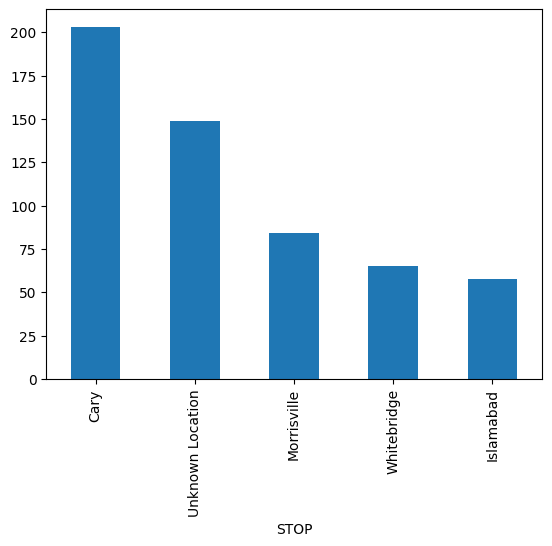

In [36]:
df['STOP'].value_counts().head(5).plot(kind='bar')

We can see that most of the STOPPAGES were at 'CARY' , then unknown locations , MORRISVILLE , WHITEBRIDGE , ISLAMABAD

In [37]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


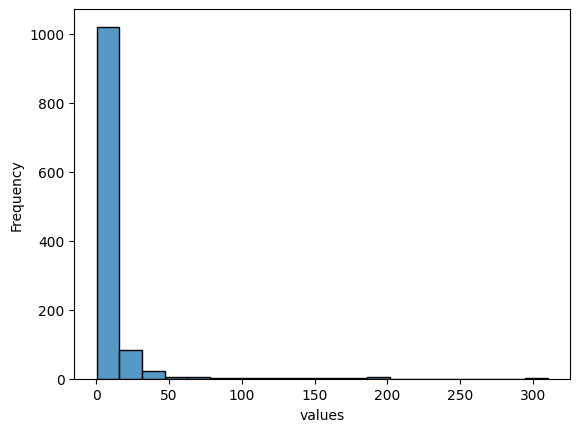

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data = df['MILES'] , bins = 20  )
plt.xlabel("values")
plt.ylabel("Frequency")
plt.show()

In [41]:
df['MILES'].max()

310.3

We can see from above data that most of the trips were of around 0-20 miles

In [42]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [44]:
df['PURPOSE'].value_counts().tail()

,count
PURPOSE,
Between Offices,18
Moving,4
Airport/Travel,3
Charity ($),1
Commute,1


<Axes: xlabel='PURPOSE'>

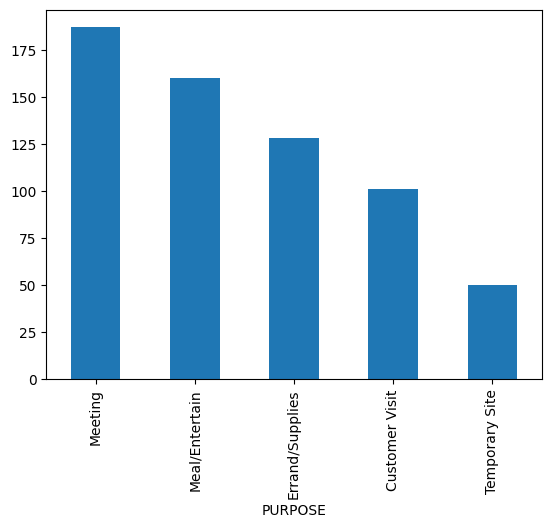

In [43]:
df['PURPOSE'].value_counts().head(5).plot(kind = 'bar')

The purpose for max  trips was " MEETINGS " ,  2) MEAL/ ENTERTAIN  3) ERRAND/SUPPLIES  and the min for  " CHARITY " or  " COMMUTE " purpose

<Axes: xlabel='MILES', ylabel='DURATION'>

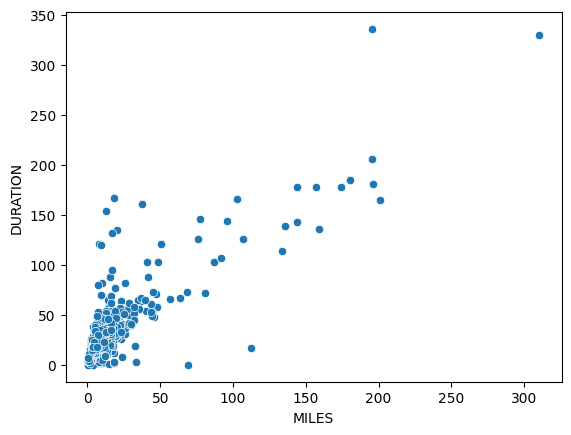

In [49]:
sns.scatterplot(x = df['MILES'] , y = df['DURATION'])